<a href="https://colab.research.google.com/github/Kim-TaeKyoung/coex/blob/main/COEX_FigureMaker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')

# RESTART THE RUNTIME

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
^C


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab/COEX/2021-11-30/2021-11-30-cam1234.csv')

In [ ]:
df = df.drop(columns=['채널', '트리거 번호'])

In [ ]:
for i, row in df.iterrows():
  df.at[i, '시간'] = row['시간'][:-6]

In [ ]:
try:
  df['시간'] = pd.to_datetime(df['시간'], format='%Y/%m/%d %H:%M')
except ValueError:
  df['시간'] = pd.to_datetime(df['시간'], format='%m/%d/%Y %H:%M')

In [ ]:
date = df['시간'].dt.date[0]
df['시간'] = df['시간'].dt.time

In [ ]:
df = df[df['시간'] > datetime(1920, 1, 1, 5, 0).time()]

In [ ]:
triggers = list(df.groupby('트리거 이름'))

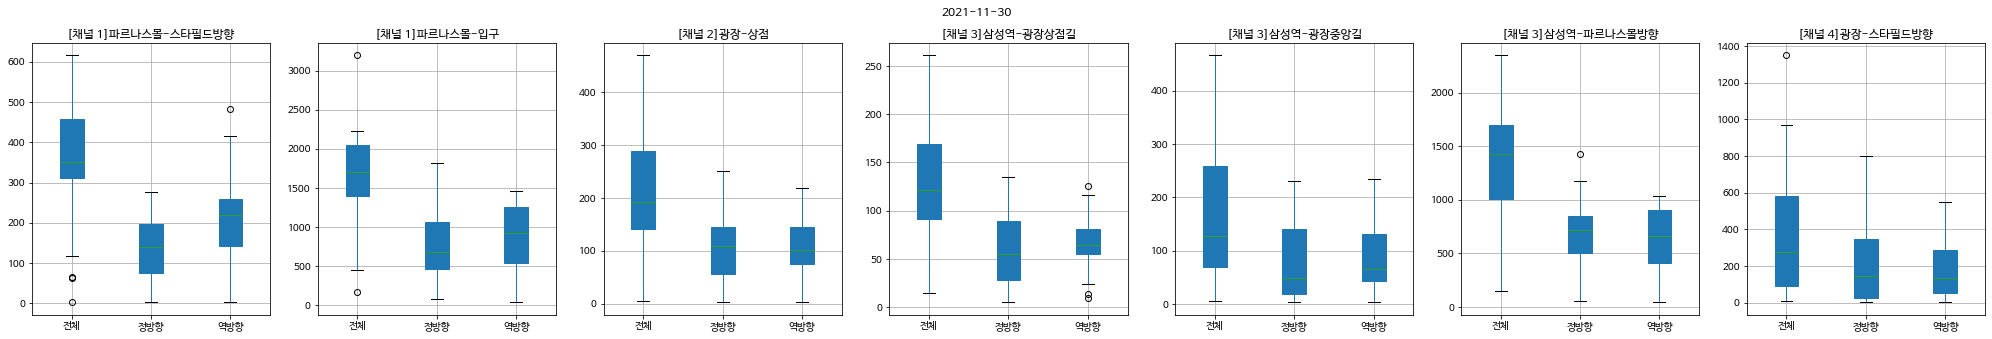

In [ ]:
fig = plt.figure(figsize=(len(triggers) * 5, 5))
ax = fig.subplots(ncols=len(triggers), nrows=1)

for i, t in enumerate(triggers):
  name = t[0]
  data = t[1]
  
  ax[i].set_title(name)
  data.boxplot(ax=ax[i], patch_artist=True)

fig.suptitle(date)
plt.show()

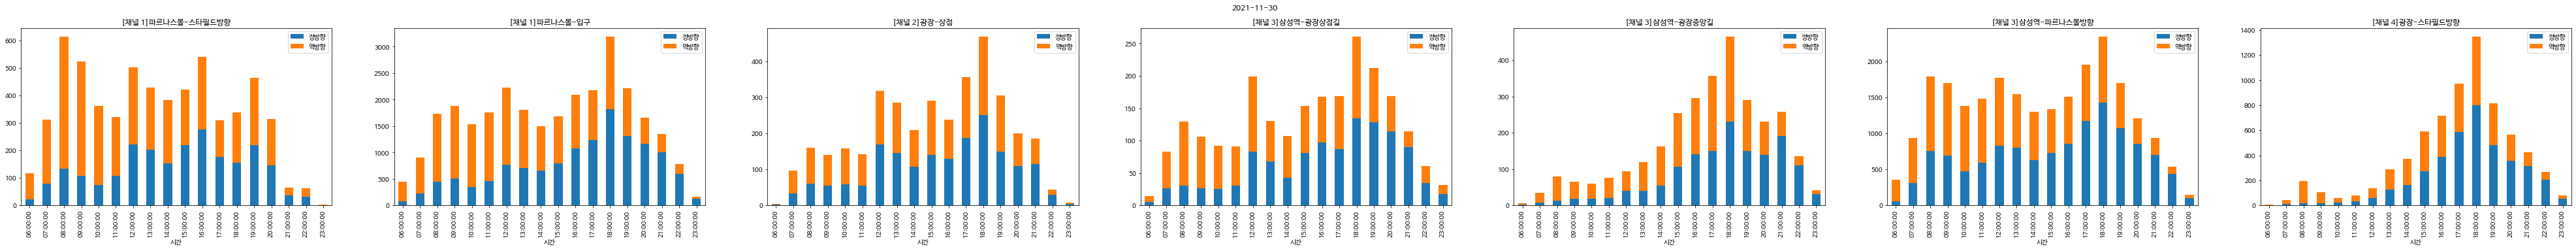

In [ ]:
fig = plt.figure(figsize=(len(triggers) * 10, 5))
ax = fig.subplots(ncols=len(triggers), nrows=1)
#fig.tight_layout()

for i, t in enumerate(triggers):
  name = t[0]
  data = t[1]

  ax[i].set_title(name)
  data.plot(stacked=True, kind='bar', x='시간', y=['정방향', '역방향'], ax=ax[i])

fig.suptitle(date)
plt.show()